<a href="https://colab.research.google.com/github/InqM/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Michael_Kolek_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

*Updated July 10, 2020*

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [331]:
import pandas as pd 

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

Check for missing/null values in the three dataframes

In [332]:
cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [333]:
population.isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [334]:
geo_country_codes.isnull().sum()

geo                         0
g77_and_oecd_countries     14
income_3groups             55
income_groups              55
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
country                     0
un_state                    0
unicef_region              78
unicode_region_subtag      25
world_4region               2
world_6region              13
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

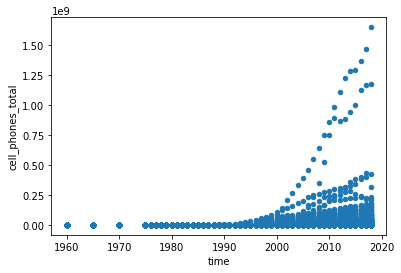

In [335]:
import matplotlib as plt
cell_phones.plot.scatter(x = 'time', y = 'cell_phones_total')

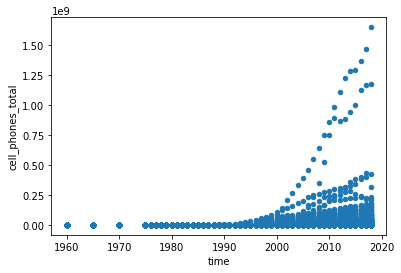

In [359]:
chn = cell_phones['geo'] = 'chn'
usa = cell_phones['geo'] = 'usa'
#us_china_only = cell_phones[chn][usa]
cell_phones.plot.scatter(x = 'time', y = 'cell_phones_total')

### Part 2 - Merge data

First, merge the `cell_phones` and `population` dataframes (with an inner merge on `geo` and `time`).

The resulting dataframe's shape should be: (8786, 4)

In [337]:
df = pd.merge(cell_phones, population, on = ['geo','time'])
df.shape

(8786, 4)

Then, select **only** the `geo` and `country` columns from the `geo_country_codes` dataframe, and merge with your population and cell phone data.

The resulting dataframe's shape should be: (8786, 5)

In [338]:
df = pd.merge(df, geo_country_codes[['geo','country']], on = 'geo')
df.shape

(8786, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.230448 cell phones per person in the United States in 2017.)

In [339]:
df['cell_phones_per_person'] = df['cell_phones_total']/df['population_total']

In [340]:
df[df['geo'] == 'usa'][df['time'] == 2017]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8319,usa,2017,400000000.0,325084758,United States,1.230448


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2018, and there are 195 unique countries represented.)

In [341]:
import numpy as np
df.describe(include = np.number)

,time,cell_phones_total,population_total,cell_phones_per_person
count,8786.000000,8.786000e+03,8.786000e+03,8786.000000
mean,1994.721603,9.701331e+06,3.002185e+07,0.298025
std,14.525220,5.968296e+07,1.172833e+08,0.468332
min,1960.000000,0.000000e+00,4.377000e+03,0.000000
25%,1983.000000,0.000000e+00,1.474928e+06,0.000000
50%,1995.000000,8.500000e+03,5.816554e+06,0.002346
75%,2007.000000,2.028511e+06,1.823047e+07,0.532728
max,2018.000000,1.649302e+09,1.427648e+09,2.699755


In [342]:
df.describe(include = np.object)

,geo,country
count,8786,8786
unique,195,195
top,gnb,South Africa
freq,47,47


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,469,882,500 |
|    ?    |     1,168,902,277 |
|    ?    |       435,193,605 |
|    ?    |       400,000,000 |
|    ?    |       227,299,663 |


In [343]:
df[df['time'] == 2017][['country','cell_phones_total']].nlargest(n = 5, columns = 'cell_phones_total')

,country,cell_phones_total
1530,China,1.469882e+09
3674,India,1.168902e+09
3627,Indonesia,4.351936e+08
8319,United States,4.000000e+08
6783,Russia,2.272997e+08


## Data Storytelling

In this part of the sprint challenge you'll work to recreate a visualization from the 538 article: [A Statistical Analysis of the Work of Bob Ross](https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/)

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.



In [344]:
elements = ['At least one tree', 'At least two trees', 'Deciduous tree', 'Coniferous tree', 'Clouds', 'At least one mountain', 'Grass', 'Lake', 'River or stream', 'Bushes', 'Snow-covered mountain', 'At least two mountains', 'Man-made structure', 'Cumulus clouds', 'Rocks', 'Sun', 'Waterfall', 'Snow', 'Cabin', 'Winter setting', 'Frame', 'Path', 'Oval frame', 'Ocean', 'Waves', 'Beach', 'Cirrus clouds', 'Fence', 'Fog', 'Hills', 'Barn', 'Nighttime', 'Flowers', 'Palm tree', 'Cliff', 'Bridge']
percentages = [91,85,56,53,44,39,36,34,33,30,26,24,22,21,20,20,20,19,18,18,13,13,9,9,9,7,7,6,6,4,4,3,2,2,2,2]

# reverse the order of the dataframe columns for easier plotting
elements.reverse()
percentages.reverse()

df = pd.DataFrame({'element': elements, 'percent': percentages})

### Part 1 — Recreate this explanatory visualization:
Your task is to reproduce the graph below, however, your graph **DOES NOT NEED TO BE PIXEL PERFECT** the specific expectations for your graph are outlined below: 

**Your plot should include:**
- A horizontal bar chart with a bar for each element of Bob Ross paintings <https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.barh.html>
- Title in the upper left: _"The Paintings of Bob Ross"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Percentage containing each element"_
- Bar color should be light blue.
- Figure and axes backgrounds (facecolor) should be gray-ish.
- One y axis label for each bar.


**Hints:**

- Light blue color of bars: #0090D5
- Gray color of background: #F0F0F0
- Using a `figsize` of (6,13) will ensure that your graph is appropriately shaped. We have already added this to the `plt.subplots()` call for you.


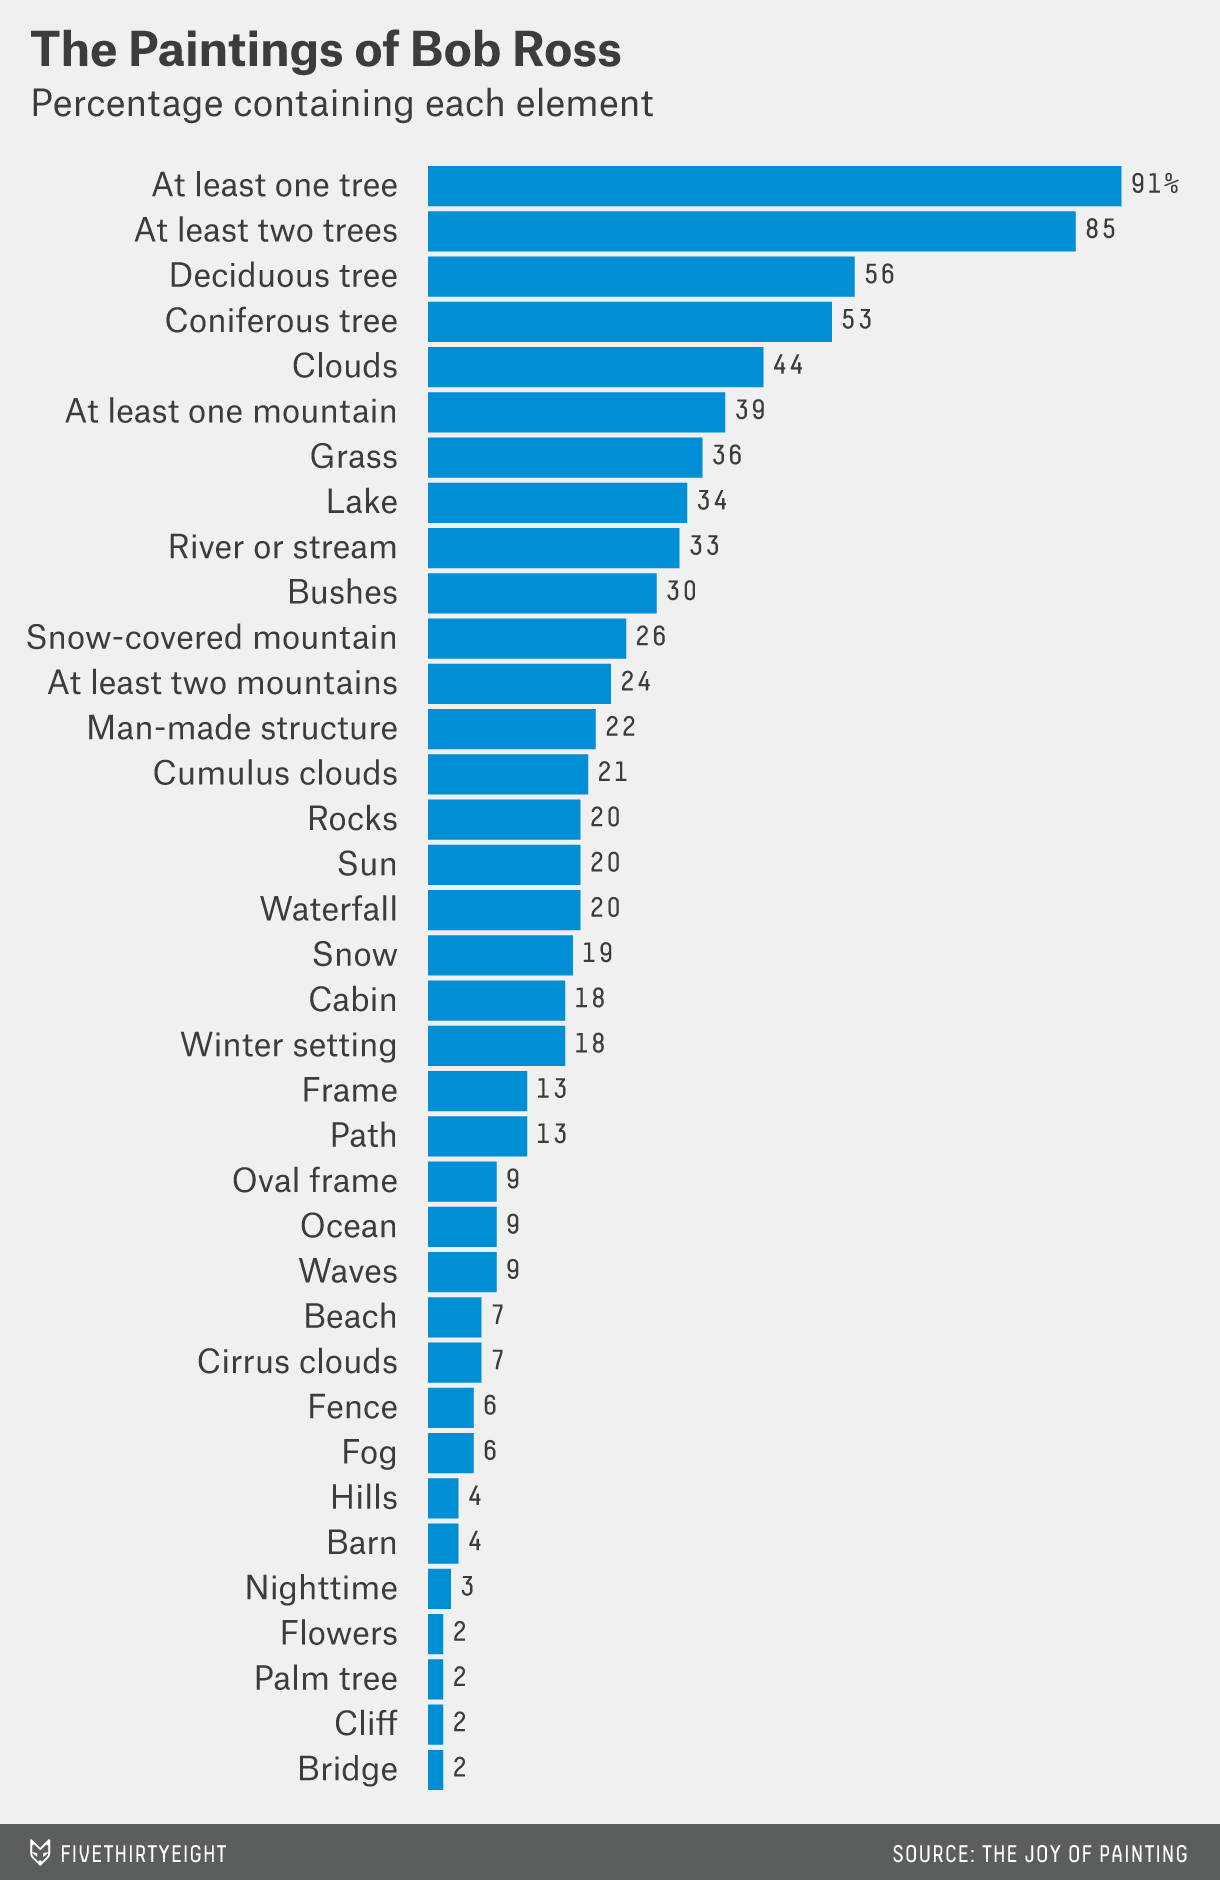

In [345]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png'
example = Image(png, width=500)
display(example)

In [346]:
df.describe()

,percent
count,36.000000
mean,22.416667
std,21.681295
min,2.000000
25%,6.750000
50%,18.500000
75%,30.750000
max,91.000000


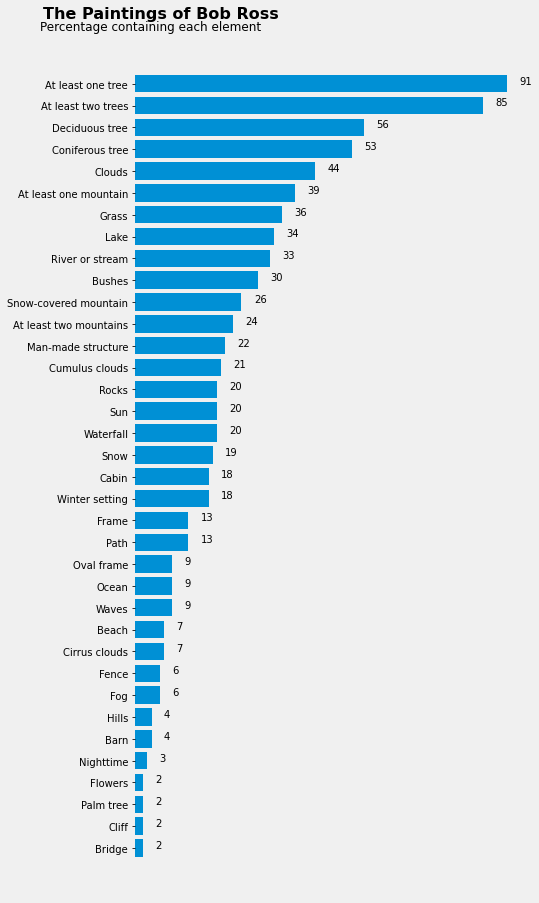

In [347]:
# Here's some starter code for you:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,13))

# YOUR CODE HERE

#A horizontal bar chart with a bar for each element of Bob Ross paintings.
#Bar color should be light blue.✓
ax.barh(range(36), df['percent'], color='#0090D5')

#Title in the upper left: "The Paintings of Bob Ross" with more visual emphasis than the subtitle. (Bolder and/or larger font.)✓
plt.suptitle(t = 'The Paintings of Bob Ross', x = 0.13, size = 16, weight = 'bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])

#Subtitle underneath the title: "Percentage containing each element"✓
plt.title(label= "Percentage containing each element", x=0.04)

#Figure and axes backgrounds (facecolor) should be gray-ish.✓
fig.set_facecolor('#F0F0F0')
ax.set_facecolor('#F0F0F0')

#One y axis label for each bar.
#ax.set_yticks(df['percent'])
ax.set_yticks(range(36))
ax.set_yticklabels(df['element'])
ax.set_xticklabels('')

#Extra
plt.tick_params(axis='x',bottom=False,labelbottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

count = 0
for i in df['percent']:    
    ax.text(i + 3, count, str(i))
    count = count + 1

#Result
plt.show()

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" merge when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by:

- removing the spines and x-axis from the graph
- adding numbers to end of the bars.

If you have already completed everything else, take this as far as you can within the time limit.
